## 標準化->平均値
また、正規化を行う際には
rawデータを正規化→被験者ごとに平均・標準偏差を求める　です。
 
ただし、水平直線飛行なので、RawDataからいったん高度は5000を引いた値、針路は262を引いた値、速度は120を引いた値を新たなRawDataとしました。
正規化を施せば同じ値になるのかもしれませんが、目標値は5000feet、針路は262度、速度は120ktなのでこのようにやりました。

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import japanize_matplotlib
import seaborn as sns


In [2]:
df_straights = pd.read_csv('straight_rev1.csv',index_col=0)
df_straights 

,Lcl.Date,Lcl.Time,UTCOfst,flag,flagname,AtvWpt,Latitude,Longitude,AltInd,BaroA,...,Longitude.wind,Longitude.windarrow1,Longitude.windarrow2,timestamp,id,diff_lat,diff_lon,pilot,row,flight_no
0,2024/4/25,09:43:48,+09:00,1,NaN,NaN,38.140469,140.840106,4999.2,0.3,...,140.840921,140.840109,140.840106,2024-04-25T 09:43:48,1,NaN,NaN,0,1,1
1,2024/4/25,09:43:49,+09:00,1,NaN,NaN,38.140456,140.839322,4999.2,0.3,...,140.840136,140.839325,140.839321,2024-04-25T 09:43:49,1,NaN,NaN,0,2,1
2,2024/4/25,09:43:50,+09:00,1,NaN,NaN,38.140444,140.838537,4999.2,0.3,...,140.839351,140.838540,140.838537,2024-04-25T 09:43:50,1,NaN,NaN,0,3,1
3,2024/4/25,09:43:51,+09:00,1,NaN,NaN,38.140431,140.837754,4999.2,0.3,...,140.838569,140.837757,140.837754,2024-04-25T 09:43:51,1,NaN,NaN,0,4,1
4,2024/4/25,09:43:52,+09:00,1,NaN,NaN,38.140418,140.836970,4999.2,0.3,...,140.837784,140.836973,140.836970,2024-04-25T 09:43:52,1,NaN,NaN,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,2022/10/19,15:30:40,+09:00,30,NaN,NaN,38.056523,140.451066,4994.5,0.3,...,140.451880,140.451069,140.451066,2022-10-19T 15:30:40,36,0.000011,0.000796,atp45029,116,32
3716,2022/10/19,15:30:41,+09:00,30,NaN,NaN,38.056513,140.450270,4995.4,0.3,...,140.451085,140.450273,140.450270,2022-10-19T 15:30:41,36,0.000009,0.000796,atp45029,117,32
3717,2022/10/19,15:30:42,+09:00,30,NaN,NaN,38.056505,140.449476,4995.3,0.3,...,140.450291,140.449479,140.449476,2022-10-19T 15:30:42,36,0.000008,0.000794,atp45029,118,32
3718,2022/10/19,15:30:43,+09:00,30,NaN,NaN,38.056497,140.448681,4996.0,0.3,...,140.449495,140.448684,140.448680,2022-10-19T 15:30:43,36,0.000008,0.000795,atp45029,119,32


In [3]:
#エンジン出力：Powerを追加　右エンジンと左エンジンの出力％の平均値にする
df_straights['Power'] = (df_straights['E1..Pwr']+ df_straights['E2..Pwr'])/2
df_straights

,Lcl.Date,Lcl.Time,UTCOfst,flag,flagname,AtvWpt,Latitude,Longitude,AltInd,BaroA,...,Longitude.windarrow1,Longitude.windarrow2,timestamp,id,diff_lat,diff_lon,pilot,row,flight_no,Power
0,2024/4/25,09:43:48,+09:00,1,NaN,NaN,38.140469,140.840106,4999.2,0.3,...,140.840109,140.840106,2024-04-25T 09:43:48,1,NaN,NaN,0,1,1,0.610
1,2024/4/25,09:43:49,+09:00,1,NaN,NaN,38.140456,140.839322,4999.2,0.3,...,140.839325,140.839321,2024-04-25T 09:43:49,1,NaN,NaN,0,2,1,0.610
2,2024/4/25,09:43:50,+09:00,1,NaN,NaN,38.140444,140.838537,4999.2,0.3,...,140.838540,140.838537,2024-04-25T 09:43:50,1,NaN,NaN,0,3,1,0.610
3,2024/4/25,09:43:51,+09:00,1,NaN,NaN,38.140431,140.837754,4999.2,0.3,...,140.837757,140.837754,2024-04-25T 09:43:51,1,NaN,NaN,0,4,1,0.605
4,2024/4/25,09:43:52,+09:00,1,NaN,NaN,38.140418,140.836970,4999.2,0.3,...,140.836973,140.836970,2024-04-25T 09:43:52,1,NaN,NaN,0,5,1,0.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,2022/10/19,15:30:40,+09:00,30,NaN,NaN,38.056523,140.451066,4994.5,0.3,...,140.451069,140.451066,2022-10-19T 15:30:40,36,0.000011,0.000796,atp45029,116,32,0.615
3716,2022/10/19,15:30:41,+09:00,30,NaN,NaN,38.056513,140.450270,4995.4,0.3,...,140.450273,140.450270,2022-10-19T 15:30:41,36,0.000009,0.000796,atp45029,117,32,0.615
3717,2022/10/19,15:30:42,+09:00,30,NaN,NaN,38.056505,140.449476,4995.3,0.3,...,140.449479,140.449476,2022-10-19T 15:30:42,36,0.000008,0.000794,atp45029,118,32,0.610
3718,2022/10/19,15:30:43,+09:00,30,NaN,NaN,38.056497,140.448681,4996.0,0.3,...,140.448684,140.448680,2022-10-19T 15:30:43,36,0.000008,0.000795,atp45029,119,32,0.615


In [4]:
datacoulumns = ['AltMSL', 'IAS', 'Pitch', 'Roll', 'HDG', 'HCDI', 'VCDI', 'Power']

In [5]:
#ただし、水平直線飛行なので、RawDataからいったん高度は5000を引いた値、針路は262を引いた値、速度は120を引いた値を新たなRawDataとしました。
for f in ['AltMSL']:
    df_straights[f] = abs(df_straights[f] - 5000)
for f in ['HDG']:
    df_straights[f] = abs(df_straights[f] - 262)
for f in ['IAS']:
    df_straights[f] = abs(df_straights[f] - 120)
for f in ['Roll']:
    df_straights[f] = abs(df_straights[f] )#Rollも追加
df_straights

,Lcl.Date,Lcl.Time,UTCOfst,flag,flagname,AtvWpt,Latitude,Longitude,AltInd,BaroA,...,Longitude.windarrow1,Longitude.windarrow2,timestamp,id,diff_lat,diff_lon,pilot,row,flight_no,Power
0,2024/4/25,09:43:48,+09:00,1,NaN,NaN,38.140469,140.840106,4999.2,0.3,...,140.840109,140.840106,2024-04-25T 09:43:48,1,NaN,NaN,0,1,1,0.610
1,2024/4/25,09:43:49,+09:00,1,NaN,NaN,38.140456,140.839322,4999.2,0.3,...,140.839325,140.839321,2024-04-25T 09:43:49,1,NaN,NaN,0,2,1,0.610
2,2024/4/25,09:43:50,+09:00,1,NaN,NaN,38.140444,140.838537,4999.2,0.3,...,140.838540,140.838537,2024-04-25T 09:43:50,1,NaN,NaN,0,3,1,0.610
3,2024/4/25,09:43:51,+09:00,1,NaN,NaN,38.140431,140.837754,4999.2,0.3,...,140.837757,140.837754,2024-04-25T 09:43:51,1,NaN,NaN,0,4,1,0.605
4,2024/4/25,09:43:52,+09:00,1,NaN,NaN,38.140418,140.836970,4999.2,0.3,...,140.836973,140.836970,2024-04-25T 09:43:52,1,NaN,NaN,0,5,1,0.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,2022/10/19,15:30:40,+09:00,30,NaN,NaN,38.056523,140.451066,4994.5,0.3,...,140.451069,140.451066,2022-10-19T 15:30:40,36,0.000011,0.000796,atp45029,116,32,0.615
3716,2022/10/19,15:30:41,+09:00,30,NaN,NaN,38.056513,140.450270,4995.4,0.3,...,140.450273,140.450270,2022-10-19T 15:30:41,36,0.000009,0.000796,atp45029,117,32,0.615
3717,2022/10/19,15:30:42,+09:00,30,NaN,NaN,38.056505,140.449476,4995.3,0.3,...,140.449479,140.449476,2022-10-19T 15:30:42,36,0.000008,0.000794,atp45029,118,32,0.610
3718,2022/10/19,15:30:43,+09:00,30,NaN,NaN,38.056497,140.448681,4996.0,0.3,...,140.448684,140.448680,2022-10-19T 15:30:43,36,0.000008,0.000795,atp45029,119,32,0.615


In [6]:
#matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#sns.pairplot(df_straights[datacoulumns])

In [7]:
flagnames = list(set(df_straights['flag']))#['auto_pilot', 'Straight_218C0494', 'Straight_219C0031', 'Straight_219C0037', 'Straight_219C0055', 'Straight_219C0055_2', 'Straight_219C0090', 'Straight_219C0177', 'Straight_219C0229_2', 'Straight_219C0267_2', 'Straight__219C0313', 'Straight_219C0318', 'Straight_219C0318_2', 'Straight_219C0370', 'Straight_219C0370_2', 'Straight_220M0016', 'ILS_R550_220M0039', 'Strraight_220M0039_2', 'ILS_R550_222M0087', 'Straight_220M0087_2', 'Straight_222M0004_3', 'Straight_220M0016_2', 'Straight_222M0032', 'Straight_222M0032_3', 'Straight_222M0052', 'Straight_222M0052_2', '44015_Straight', '45029_ILSR550_5']
print('データ種類',len(flagnames))
pd_flagnameinfo = pd.DataFrame(flagnames, columns=['flagname'])

データ種類 30


In [8]:

# 標準化
scaler = StandardScaler()
df_scaled = df_straights.copy()
df_scaled[datacoulumns] = scaler.fit_transform(df_straights[datacoulumns])

# 標準化後の最初の数行を表示
df_scaled.to_csv('straight_flagnameinfo_standard.csv')

#重要指標の平均・標準偏差
tmplists = [[] for i in range(len(datacoulumns)*2)]
for p_csvinfo in pd_flagnameinfo.iloc:
    pd_datas = df_scaled[df_scaled['flag'] == p_csvinfo['flagname']]  
    pd_data_describe = pd_datas[datacoulumns].describe()
    for i in range(len(datacoulumns)):
        tmplists[i].append(pd_data_describe.iloc[1,i])
        tmplists[i+len(datacoulumns)].append(pd_data_describe.iloc[2,i])
# 平均と標準偏差の列を追加
for i, column in enumerate(datacoulumns):
    pd_flagnameinfo[f'mean_{column}'] = tmplists[i]  # 平均
    pd_flagnameinfo[f'std_{column}'] = tmplists[i+len(datacoulumns)]   # 標準偏差



In [9]:
#標準化なしデータ
df_straights.to_csv('straight_flagnameinfo_nostandard.csv')

#重要指標の平均・標準偏差
tmplists = [[] for i in range(len(datacoulumns)*2)]
for p_csvinfo in pd_flagnameinfo.iloc:
    pd_datas = df_straights[df_straights['flag'] == p_csvinfo['flagname']]  
    pd_data_describe = pd_datas[datacoulumns].describe()
    for i in range(len(datacoulumns)):
        tmplists[i].append(pd_data_describe.iloc[1,i])
        tmplists[i+len(datacoulumns)].append(pd_data_describe.iloc[2,i])
# 平均と標準偏差の列を追加
for i, column in enumerate(datacoulumns):
    pd_flagnameinfo[f'mean_nostd_{column}'] = tmplists[i]  # 平均
    pd_flagnameinfo[f'std_nostd_{column}'] = tmplists[i+len(datacoulumns)]   # 標準偏差
    
    
pd_flagnameinfo.to_csv('straight_flagnameinfo_meanstd.csv')

In [10]:
#データ件数確認
tmplists = []
for flagname in flagnames :
    pd_datas = df_straights[df_straights['flag'] == flagname]
    tmplists.append(len(pd_datas))
pd_flagnameinfo['datanum'] = tmplists
pd_flagnameinfo


,flagname,mean_AltMSL,std_AltMSL,mean_IAS,std_IAS,mean_Pitch,std_Pitch,mean_Roll,std_Roll,mean_HDG,...,std_nostd_Roll,mean_nostd_HDG,std_nostd_HDG,mean_nostd_HCDI,std_nostd_HCDI,mean_nostd_VCDI,std_nostd_VCDI,mean_nostd_Power,std_nostd_Power,datanum
0,1,-1.057531,0.015461,-0.921861,0.006914,0.258530,5.574390e-17,-1.077231,0.057678,-0.795078,...,0.048486,0.200000,0.000000,-4242.000000,0.000000,-4242.000000,0.000000e+00,0.609625,1.322479e-03,120
1,2,0.242519,0.813927,0.444855,0.950605,-0.150337,6.022442e-01,-0.599223,0.445994,-0.265732,...,0.374921,0.555833,0.464323,-28.494167,5.577917,-4242.000000,0.000000e+00,0.615000,1.114878e-16,120
2,3,-0.429168,0.500230,-0.248844,0.777764,0.075987,1.311746e+00,-0.246813,0.671278,-0.465322,...,0.564304,0.421667,0.287903,23.260833,5.252183,-4242.000000,0.000000e+00,0.619625,2.297388e-02,120
3,4,0.031754,0.877891,0.081493,0.639094,0.468920,9.028558e-01,0.805063,1.694031,-0.239699,...,1.424072,0.573333,0.390159,-4242.000000,0.000000,-4242.000000,0.000000e+00,0.608708,7.545265e-03,120
4,5,-0.167917,0.830472,0.584045,1.146197,0.047213,9.725491e-01,0.207305,0.975294,0.872298,...,0.819872,1.320833,0.767611,26.306667,4.198994,-4242.000000,0.000000e+00,0.631000,9.627517e-03,120
5,6,-0.081795,0.540588,0.464036,0.963873,-0.529347,6.486044e-01,0.754705,1.317170,2.623973,...,1.107267,2.498333,0.908409,-88.497500,1.069081,-4242.000000,0.000000e+00,0.628875,2.096666e-03,120
6,7,1.259831,1.305129,0.721317,1.436981,0.675132,7.426746e-01,-0.247705,0.704686,0.383862,...,0.592388,0.992500,0.518265,12.981667,3.932091,-4242.000000,0.000000e+00,0.618000,3.348397e-02,120
7,8,0.556438,0.770848,-0.469764,0.510342,0.077688,8.573261e-01,-0.284780,0.642722,-0.102094,...,0.540298,0.665833,0.514250,20.669167,4.480992,-4242.000000,0.000000e+00,0.601083,1.134233e-02,120
8,9,0.623782,0.731706,-0.317981,0.357818,-0.153276,6.532854e-01,0.427078,1.326861,0.439648,...,1.115414,1.030000,0.731017,-88.500833,1.058260,-4242.000000,0.000000e+00,0.593458,8.116687e-03,120
9,10,2.406415,1.829117,-0.184878,0.675030,-0.100060,1.087470e+00,1.363268,1.627787,0.541302,...,1.368384,1.098333,0.941569,8.020833,2.657885,-4242.000000,0.000000e+00,0.615542,3.967725e-02,120


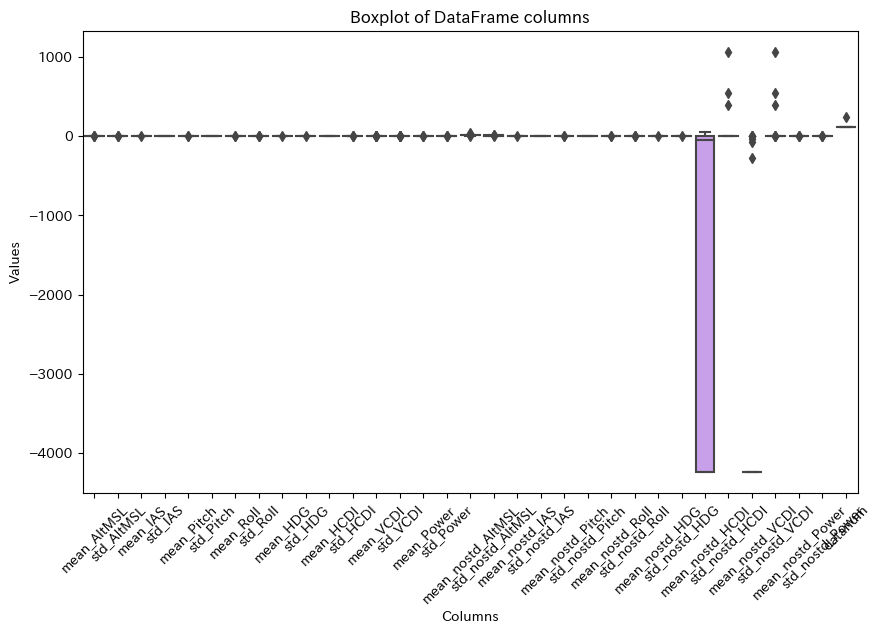

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplotの描画
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd_flagnameinfo.iloc[:,1:])
plt.title('Boxplot of DataFrame columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # X軸のラベルを回転させることで見やすくします
plt.show()

In [12]:
target = ['mean_AltMSL','mean_Roll','mean_HDG','mean_IAS', 'std_Pitch','std_AltMSL','std_Roll','std_HDG','std_IAS', 'std_Power']
target_nostd = ['mean_nostd_AltMSL','mean_nostd_Roll','mean_nostd_HDG','mean_nostd_IAS', 'std_nostd_Pitch','std_nostd_AltMSL','std_nostd_Roll','std_nostd_HDG','std_nostd_IAS', 'std_nostd_Power']

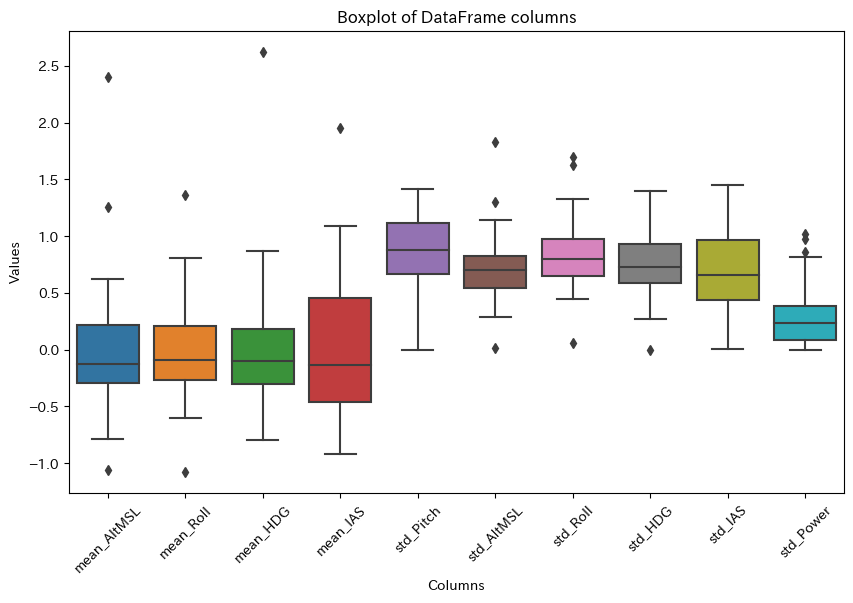

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplotの描画
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd_flagnameinfo[target])
plt.title('Boxplot of DataFrame columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # X軸のラベルを回転させることで見やすくします
plt.show()

In [14]:
pd_flagnameinfo[target].describe()

,mean_AltMSL,mean_Roll,mean_HDG,mean_IAS,std_Pitch,std_AltMSL,std_Roll,std_HDG,std_IAS,std_Power
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,3.000000e+01,30.000000,30.000000
mean,0.006270,0.007244,0.010965,0.017072,8.760864e-01,0.723626,0.827107,7.507898e-01,0.708677,0.313915
std,0.632210,0.486815,0.620020,0.647336,3.228981e-01,0.331942,0.338015,3.032308e-01,0.339161,0.286855
min,-1.057531,-1.077231,-0.795078,-0.921861,5.574390e-17,0.015461,0.057678,1.114878e-16,0.006914,0.000000
25%,-0.290114,-0.263764,-0.304473,-0.465719,6.645753e-01,0.543191,0.646169,5.849143e-01,0.434881,0.083672
50%,-0.124856,-0.092962,-0.095896,-0.139260,8.800910e-01,0.701250,0.794750,7.273162e-01,0.657062,0.235172
75%,0.216817,0.208717,0.179934,0.459241,1.116635e+00,0.826336,0.971618,9.289361e-01,0.963470,0.383704
max,2.406415,1.363268,2.623973,1.954763,1.412504e+00,1.829117,1.694031,1.400698e+00,1.450304,1.023161


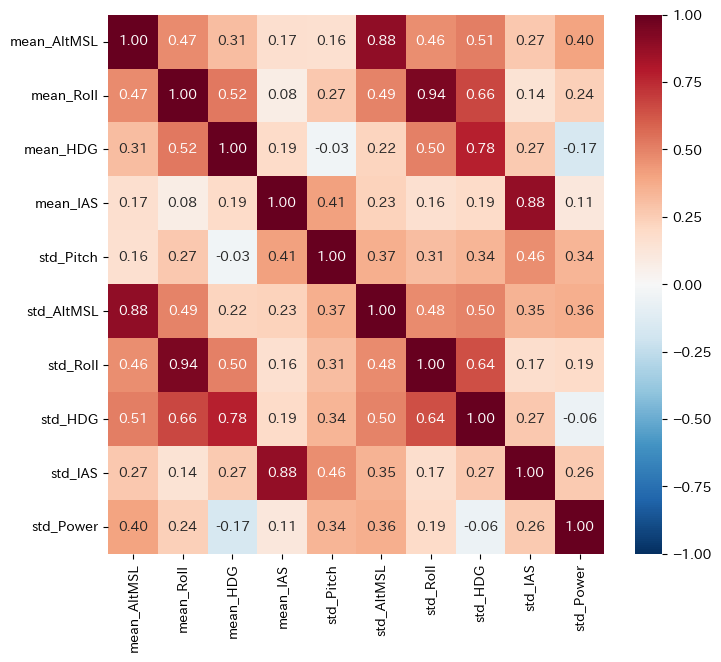

,mean_AltMSL,mean_Roll,mean_HDG,mean_IAS,std_Pitch,std_AltMSL,std_Roll,std_HDG,std_IAS,std_Power
mean_AltMSL,1.000000,0.471697,0.312328,0.170363,0.161024,0.883760,0.464243,0.514498,0.268691,0.398736
mean_Roll,0.471697,1.000000,0.524746,0.076050,0.269266,0.493538,0.939216,0.664335,0.140688,0.236314
mean_HDG,0.312328,0.524746,1.000000,0.190251,-0.031302,0.220545,0.500960,0.775235,0.265133,-0.168319
mean_IAS,0.170363,0.076050,0.190251,1.000000,0.410147,0.228457,0.159355,0.193091,0.879270,0.114261
std_Pitch,0.161024,0.269266,-0.031302,0.410147,1.000000,0.365940,0.308939,0.339631,0.461416,0.341248
std_AltMSL,0.883760,0.493538,0.220545,0.228457,0.365940,1.000000,0.475828,0.496486,0.345418,0.363897
std_Roll,0.464243,0.939216,0.500960,0.159355,0.308939,0.475828,1.000000,0.644459,0.172453,0.189615
std_HDG,0.514498,0.664335,0.775235,0.193091,0.339631,0.496486,0.644459,1.000000,0.269477,-0.061717
std_IAS,0.268691,0.140688,0.265133,0.879270,0.461416,0.345418,0.172453,0.269477,1.000000,0.263926
std_Power,0.398736,0.236314,-0.168319,0.114261,0.341248,0.363897,0.189615,-0.061717,0.263926,1.000000


In [15]:
data = pd_flagnameinfo[target]
plt.figure(figsize=(8, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="RdBu_r", center=0, vmin=-1, vmax=1)
plt.show()

data.corr()


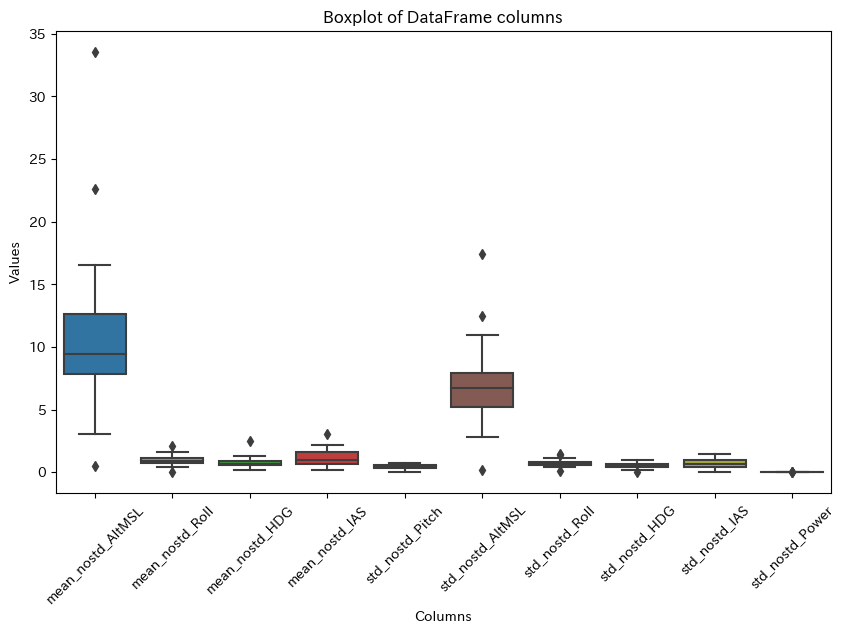

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplotの描画
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd_flagnameinfo[target_nostd])
plt.title('Boxplot of DataFrame columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)#, ticks=range(0, 16), labels=list(pd_flagnameinfo.iloc[:,1:17].columns
plt.show()

In [17]:
pd_flagnameinfo.iloc[:,17:33].corr()

,mean_nostd_AltMSL,std_nostd_AltMSL,mean_nostd_IAS,std_nostd_IAS,mean_nostd_Pitch,std_nostd_Pitch,mean_nostd_Roll,std_nostd_Roll,mean_nostd_HDG,std_nostd_HDG,mean_nostd_HCDI,std_nostd_HCDI,mean_nostd_VCDI,std_nostd_VCDI,mean_nostd_Power,std_nostd_Power
mean_nostd_AltMSL,1.000000,0.883760,0.170363,0.268691,0.187823,0.161024,0.471697,0.464243,0.312328,0.514498,0.229293,-0.114322,-0.162474,-0.133974,0.302909,0.398736
std_nostd_AltMSL,0.883760,1.000000,0.228457,0.345418,0.228173,0.365940,0.493538,0.475828,0.220545,0.496486,0.100187,0.028111,-0.102977,0.012181,0.393079,0.363897
mean_nostd_IAS,0.170363,0.228457,1.000000,0.879270,0.395230,0.410147,0.076050,0.159355,0.190251,0.193091,-0.101484,-0.198898,-0.169886,-0.220940,0.302307,0.114261
std_nostd_IAS,0.268691,0.345418,0.879270,1.000000,0.414757,0.461416,0.140688,0.172453,0.265133,0.269477,0.055933,-0.122296,-0.241347,-0.137885,0.366081,0.263926
mean_nostd_Pitch,0.187823,0.228173,0.395230,0.414757,1.000000,0.227162,-0.068498,0.029536,-0.251179,-0.175118,-0.423963,-0.017046,-0.403397,-0.051249,0.610022,0.318378
std_nostd_Pitch,0.161024,0.365940,0.410147,0.461416,0.227162,1.000000,0.269266,0.308939,-0.031302,0.339631,-0.057421,0.048672,-0.142691,0.037687,0.240171,0.341248
mean_nostd_Roll,0.471697,0.493538,0.076050,0.140688,-0.068498,0.269266,1.000000,0.939216,0.524746,0.664335,-0.049654,-0.164048,-0.221697,-0.159032,0.074604,0.236314
std_nostd_Roll,0.464243,0.475828,0.159355,0.172453,0.029536,0.308939,0.939216,1.000000,0.500960,0.644459,-0.093310,-0.144642,-0.229255,-0.142772,0.094996,0.189615
mean_nostd_HDG,0.312328,0.220545,0.190251,0.265133,-0.251179,-0.031302,0.524746,0.500960,1.000000,0.775235,0.259458,-0.143756,-0.066576,-0.139938,0.142793,-0.168319
std_nostd_HDG,0.514498,0.496486,0.193091,0.269477,-0.175118,0.339631,0.664335,0.644459,0.775235,1.000000,0.227490,-0.054670,-0.045466,-0.050282,0.163551,-0.061717


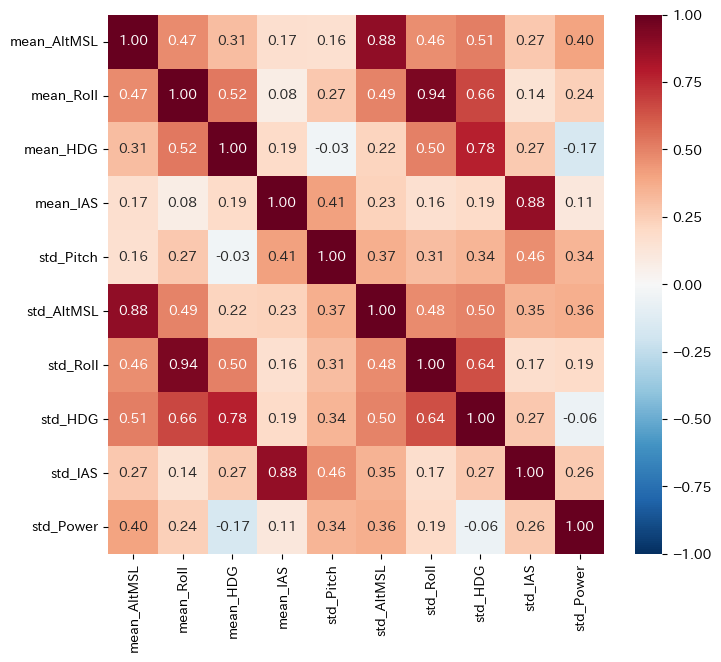

,mean_AltMSL,mean_Roll,mean_HDG,mean_IAS,std_Pitch,std_AltMSL,std_Roll,std_HDG,std_IAS,std_Power
mean_AltMSL,1.000000,0.471697,0.312328,0.170363,0.161024,0.883760,0.464243,0.514498,0.268691,0.398736
mean_Roll,0.471697,1.000000,0.524746,0.076050,0.269266,0.493538,0.939216,0.664335,0.140688,0.236314
mean_HDG,0.312328,0.524746,1.000000,0.190251,-0.031302,0.220545,0.500960,0.775235,0.265133,-0.168319
mean_IAS,0.170363,0.076050,0.190251,1.000000,0.410147,0.228457,0.159355,0.193091,0.879270,0.114261
std_Pitch,0.161024,0.269266,-0.031302,0.410147,1.000000,0.365940,0.308939,0.339631,0.461416,0.341248
std_AltMSL,0.883760,0.493538,0.220545,0.228457,0.365940,1.000000,0.475828,0.496486,0.345418,0.363897
std_Roll,0.464243,0.939216,0.500960,0.159355,0.308939,0.475828,1.000000,0.644459,0.172453,0.189615
std_HDG,0.514498,0.664335,0.775235,0.193091,0.339631,0.496486,0.644459,1.000000,0.269477,-0.061717
std_IAS,0.268691,0.140688,0.265133,0.879270,0.461416,0.345418,0.172453,0.269477,1.000000,0.263926
std_Power,0.398736,0.236314,-0.168319,0.114261,0.341248,0.363897,0.189615,-0.061717,0.263926,1.000000


In [18]:
#正規化していないデータ
data = pd_flagnameinfo[target_nostd]
data.columns = target
plt.figure(figsize=(8, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="RdBu_r", center=0, vmin=-1, vmax=1)
plt.show()

data.corr()


In [19]:
#PCA
from sklearn.decomposition import PCA

In [20]:
# PCAのインスタンス作成。説明変数の数だけ主成分を取得
#pca = PCA(n_components=len(df_flagnameinfo.columns)-1)
pca = PCA(n_components=0.8)#, whiten=False：正規化しない


# PCAを実行
pca.fit(pd_flagnameinfo[target])

# 各主成分の寄与率と累積寄与率
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# 結果の確認
explained_variance_ratio, cumulative_explained_variance_ratio

(array([0.43757174, 0.22708623, 0.16399593]),
 array([0.43757174, 0.66465798, 0.82865391]))

In [21]:
import matplotlib.pyplot as plt
import numpy as np

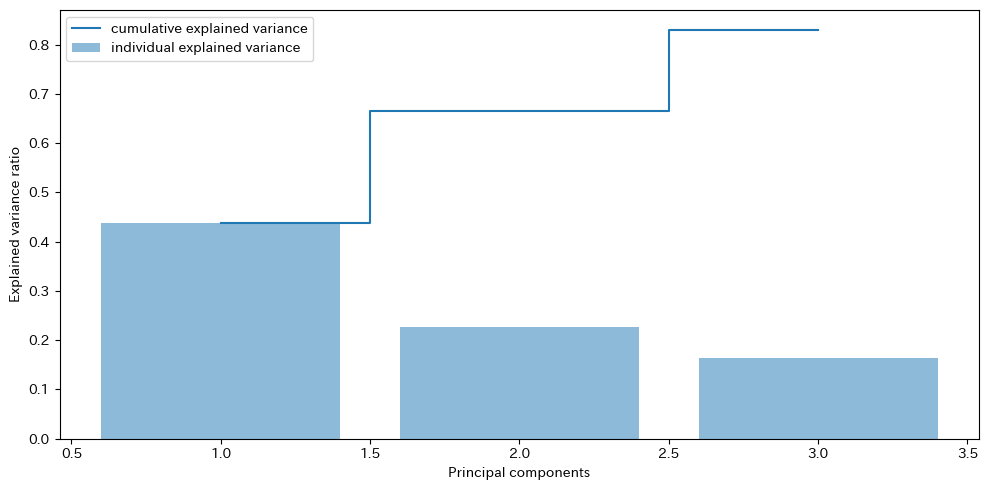

In [22]:
# 寄与率と累積寄与率のグラフを描画
plt.figure(figsize=(10, 5))

# 主成分の数
components = np.arange(1, len(explained_variance_ratio)+1)

# 寄与率
plt.bar(components, explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')

# 累積寄与率
plt.step(components, cumulative_explained_variance_ratio, where='mid', label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [23]:
# PCA の固有ベクトル
df_components = pd.DataFrame(pca.components_, columns=target, index=["PC{}".format(x + 1) for x in range(len(explained_variance_ratio))])
df_components

,mean_AltMSL,mean_Roll,mean_HDG,mean_IAS,std_Pitch,std_AltMSL,std_Roll,std_HDG,std_IAS,std_Power
PC1,0.512434,0.383445,0.454924,0.339028,0.125385,0.260123,0.267355,0.256427,0.203841,0.079474
PC2,-0.187106,-0.264712,-0.213240,0.806940,0.171961,-0.046947,-0.141043,-0.108925,0.365679,0.032277
PC3,-0.578767,0.065029,0.663911,0.098142,-0.110269,-0.311261,0.045885,0.145006,0.018933,-0.279027


<Axes: >

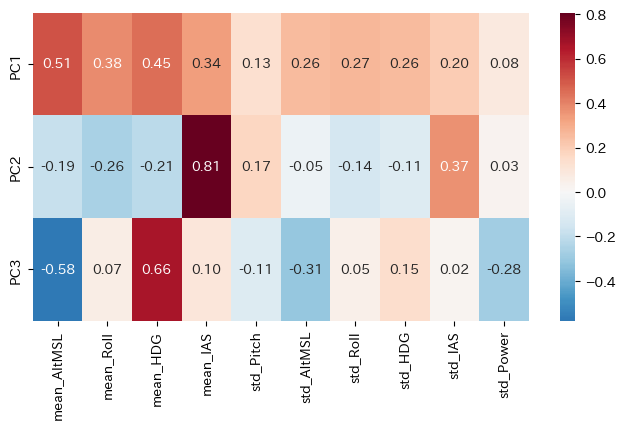

In [24]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_components, annot=True, fmt='.2f',cmap="RdBu_r", center=0)#, cmap='Blues'

In [25]:
# PCAで変換したデータの取得
pca_transformed = pd_flagnameinfo[target]
pca_transformed.columns = target

#以下はやらない！！自動正規化されてしまう！！！
#pca_transformed_data = pca.transform(pca_transformed)
#pca_transformed_data

In [26]:
pca_transformed_data = np.dot(df_components.values, pca_transformed.values.T).T
pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(len(pca_transformed_data[0]))])

,PC1,PC2,PC3
0,-1.605784,-0.096604,-0.087394
1,0.701804,0.803705,-0.493222
2,0.176537,0.407384,-0.450731
3,1.331817,-0.050622,-0.367546
4,1.732196,0.554884,0.547622
5,2.719684,-0.262257,1.904576
6,2.146580,0.765065,-0.965231
7,0.772353,-0.253183,-0.716350
8,1.570194,-0.670455,-0.202479
9,3.560789,-1.078560,-1.632682


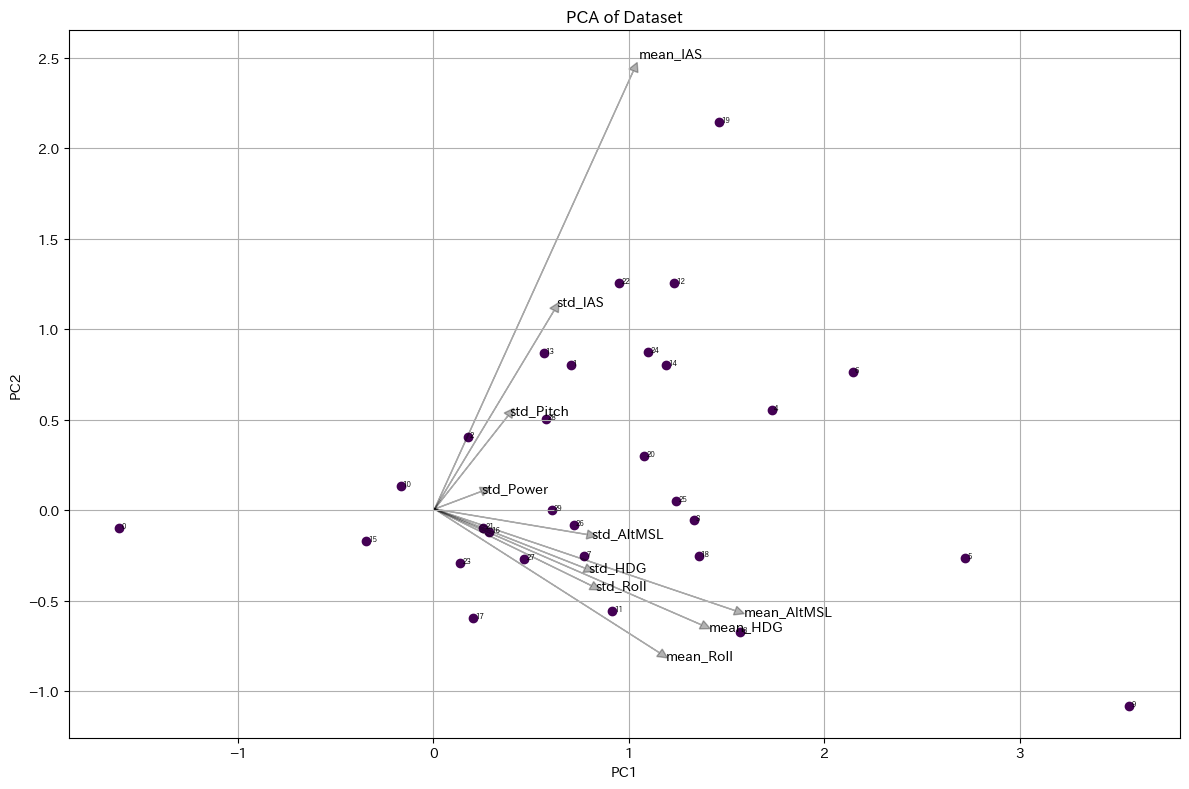

In [27]:
# 第1主成分と第2主成分でプロット
plt.figure(figsize=(12, 8))
for i, flagname in enumerate(pd_flagnameinfo['flagname']):
    plt.scatter(pca_transformed_data[i, 0], pca_transformed_data[i, 1], c=0)
    #plt.text(pca_transformed_data[i, 0] + 0.01, pca_transformed_data[i, 1], flagname, fontsize=5)
    plt.text(pca_transformed_data[i, 0] + 0.01, pca_transformed_data[i, 1], i, fontsize=5)

# 射影行列（主成分空間への射影を行う行列）
projection_matrix = pca.components_.T

    
# プロット
origin = pca.mean_

for eigen_vector, flag in zip(projection_matrix,['mean_AltMSL','mean_Roll','mean_HDG','mean_IAS', 'std_Pitch','std_AltMSL','std_Roll','std_HDG','std_IAS', 'std_Power']):
    plt.arrow(origin[0], origin[1], eigen_vector[0]*3, eigen_vector[1]*3, head_width=0.05, head_length=0.05, fc='black', ec='black', alpha=0.3)#, fc='r', ec='r')
    plt.text(eigen_vector[0]*3.1, eigen_vector[1]*3.1, flag)


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.tight_layout()

plt.show()

## kmeans法を実施

/Users/haruharukaka/.pyenv/versions/3.8.5/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


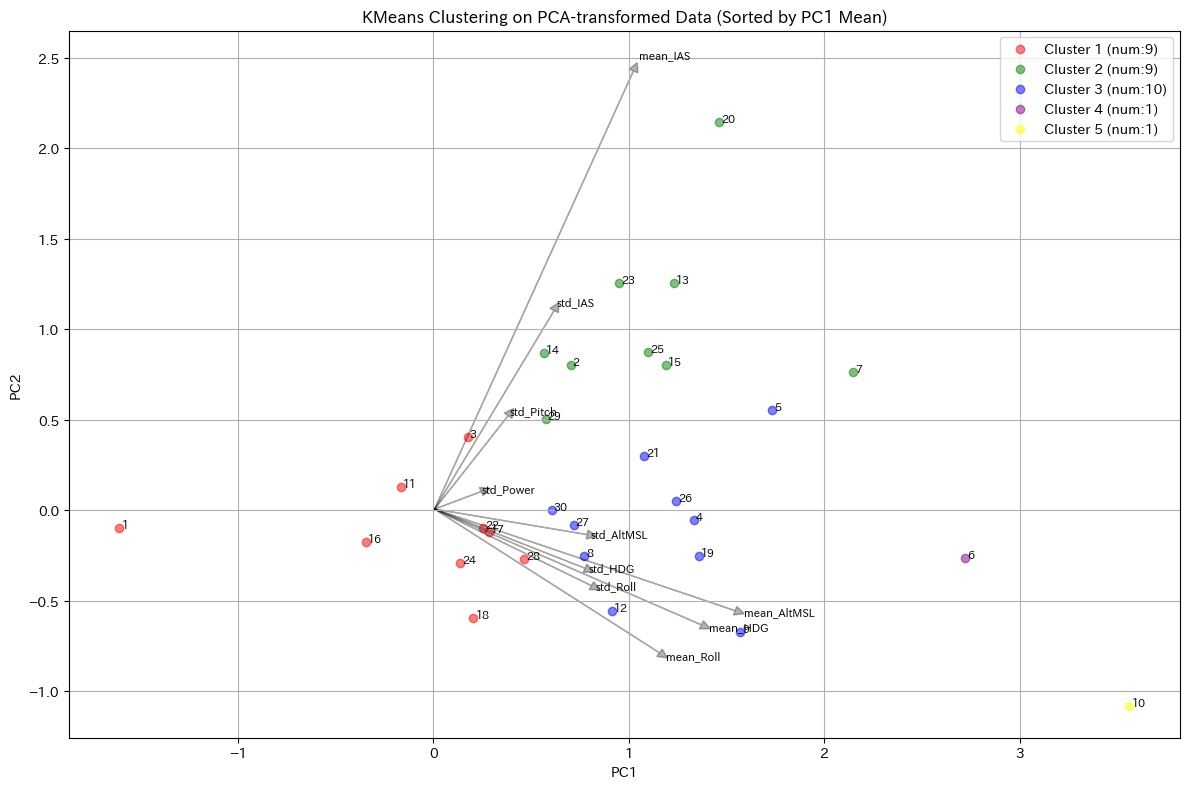

In [28]:
from sklearn.cluster import KMeans

#クラスタフラグを付与
pd_flagnameinfo['kmeans'] = 'kmeans'
# KMeansクラスタリング
# クラスタの数はとりあえず3としてみる
kmeans = KMeans(n_clusters=5, random_state=10, n_init=10)
#kmeans.fit(pca_transformed_data[:, :2])  # 最初の2主成分だけを使用
kmeans.fit(pca_transformed_data) 

# KMeansクラスタリング
kmeans = KMeans(n_clusters=5, random_state=10, n_init=10)
cluster_labels = kmeans.fit_predict(pca_transformed_data)

# pd_flagnameinfoにクラスタリング結果を追加
pd_flagnameinfo['kmeans'] = cluster_labels
# クラスタごとにPC1の平均値を計算
pc1_means = []
for label in range(kmeans.n_clusters):
    cluster_indices = np.where(cluster_labels == label)[0]
    pc1_mean = np.mean(pca_transformed_data[cluster_indices, 0])
    pc1_means.append((label, pc1_mean))

# PC1の平均値が小さい順にクラスタ番号をソート
pc1_means_sorted = sorted(pc1_means, key=lambda x: x[1])

# ソートされた順番にクラスタ番号を振り直す
cluster_mapping = {pc1_means_sorted[i][0]: i for i in range(len(pc1_means_sorted))}
pd_flagnameinfo['kmeans'] = pd_flagnameinfo['kmeans'].map(cluster_mapping)
pd_flagnameinfo['kmeans'] = pd_flagnameinfo['kmeans'] + 1
pd_flagnameinfo['kmeans'] = 'cluster' + pd_flagnameinfo['kmeans'].astype(str)

# クラスタリング結果を色分けしてプロット
colors = ['red', 'green', 'blue', 'purple', 'yellow']
plt.figure(figsize=(12, 8))
for i, (label, flagname) in enumerate(zip(cluster_labels, pd_flagnameinfo['flagname'])):
    # 新しく振り直したクラスタ番号を使用
    sorted_label = cluster_mapping[label]
    plt.scatter(pca_transformed_data[i, 0], pca_transformed_data[i, 1], color=colors[sorted_label], alpha=0.5)
    plt.text(pca_transformed_data[i, 0] + 0.01, pca_transformed_data[i, 1], i+1, fontsize=8)

# 射影行列（主成分空間への射影を行う行列）をプロット
origin = pca.mean_
projection_matrix = pca.components_.T
for eigen_vector, flag in zip(projection_matrix, ['mean_AltMSL','mean_Roll','mean_HDG','mean_IAS', 'std_Pitch','std_AltMSL','std_Roll','std_HDG','std_IAS', 'std_Power']):
    plt.arrow(origin[0], origin[1], eigen_vector[0]*3, eigen_vector[1]*3, head_width=0.05, head_length=0.05, fc='black', ec='black', alpha=0.3)
    plt.text(eigen_vector[0]*3.1, eigen_vector[1]*3.1, flag, fontsize=8)

for i, color in enumerate(colors):
    num = len(pd_flagnameinfo[pd_flagnameinfo['kmeans'] == 'cluster'+str(i+1)])#
    plt.scatter([], [], color=color, label=f'Cluster {i+1} (num:{num})', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering on PCA-transformed Data (Sorted by PC1 Mean)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [29]:
pd_flagnameinfo.to_csv('straight_flagnameinfo_meanstd_addkmeans.csv')
pd_flagnameinfo

,flagname,mean_AltMSL,std_AltMSL,mean_IAS,std_IAS,mean_Pitch,std_Pitch,mean_Roll,std_Roll,mean_HDG,...,mean_nostd_HDG,std_nostd_HDG,mean_nostd_HCDI,std_nostd_HCDI,mean_nostd_VCDI,std_nostd_VCDI,mean_nostd_Power,std_nostd_Power,datanum,kmeans
0,1,-1.057531,0.015461,-0.921861,0.006914,0.258530,5.574390e-17,-1.077231,0.057678,-0.795078,...,0.200000,0.000000,-4242.000000,0.000000,-4242.000000,0.000000e+00,0.609625,1.322479e-03,120,cluster1
1,2,0.242519,0.813927,0.444855,0.950605,-0.150337,6.022442e-01,-0.599223,0.445994,-0.265732,...,0.555833,0.464323,-28.494167,5.577917,-4242.000000,0.000000e+00,0.615000,1.114878e-16,120,cluster2
2,3,-0.429168,0.500230,-0.248844,0.777764,0.075987,1.311746e+00,-0.246813,0.671278,-0.465322,...,0.421667,0.287903,23.260833,5.252183,-4242.000000,0.000000e+00,0.619625,2.297388e-02,120,cluster1
3,4,0.031754,0.877891,0.081493,0.639094,0.468920,9.028558e-01,0.805063,1.694031,-0.239699,...,0.573333,0.390159,-4242.000000,0.000000,-4242.000000,0.000000e+00,0.608708,7.545265e-03,120,cluster3
4,5,-0.167917,0.830472,0.584045,1.146197,0.047213,9.725491e-01,0.207305,0.975294,0.872298,...,1.320833,0.767611,26.306667,4.198994,-4242.000000,0.000000e+00,0.631000,9.627517e-03,120,cluster3
5,6,-0.081795,0.540588,0.464036,0.963873,-0.529347,6.486044e-01,0.754705,1.317170,2.623973,...,2.498333,0.908409,-88.497500,1.069081,-4242.000000,0.000000e+00,0.628875,2.096666e-03,120,cluster4
6,7,1.259831,1.305129,0.721317,1.436981,0.675132,7.426746e-01,-0.247705,0.704686,0.383862,...,0.992500,0.518265,12.981667,3.932091,-4242.000000,0.000000e+00,0.618000,3.348397e-02,120,cluster2
7,8,0.556438,0.770848,-0.469764,0.510342,0.077688,8.573261e-01,-0.284780,0.642722,-0.102094,...,0.665833,0.514250,20.669167,4.480992,-4242.000000,0.000000e+00,0.601083,1.134233e-02,120,cluster3
8,9,0.623782,0.731706,-0.317981,0.357818,-0.153276,6.532854e-01,0.427078,1.326861,0.439648,...,1.030000,0.731017,-88.500833,1.058260,-4242.000000,0.000000e+00,0.593458,8.116687e-03,120,cluster3
9,10,2.406415,1.829117,-0.184878,0.675030,-0.100060,1.087470e+00,1.363268,1.627787,0.541302,...,1.098333,0.941569,8.020833,2.657885,-4242.000000,0.000000e+00,0.615542,3.967725e-02,120,cluster5


### エルボー法
適切なクラスタ数を求める一つの方法として、エルボー法があります。エルボー法は、クラスタ数を増やしていったときに、クラスタ内誤差平方和（SSE; Sum of Squared Errors）が大きく減少する点を探す方法です。この「エルボー」、つまり肘のように曲がる点が、適切なクラスタ数と考えられます。

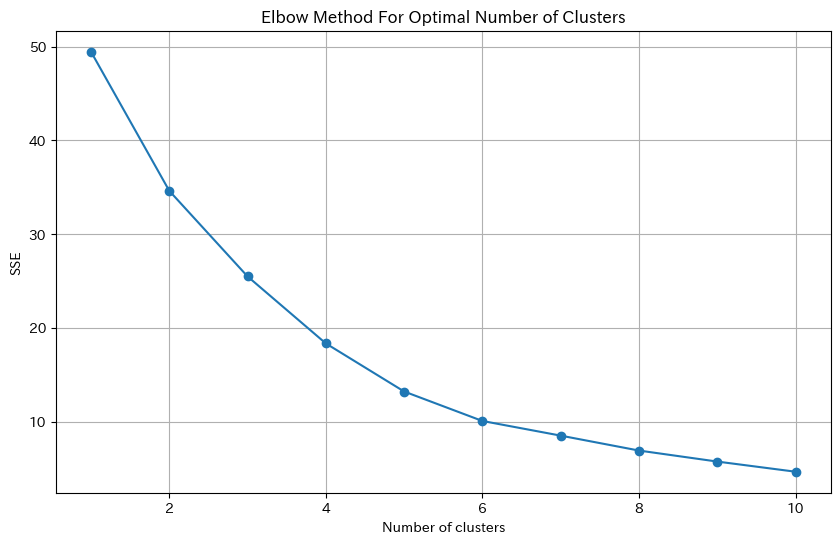

In [30]:
# クラスタ数の範囲
n_clusters_range = range(1, 11)

# 各クラスタ数におけるSSEを格納するリスト
sse = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    #kmeans.fit(pca_transformed_data[:, :2])
    kmeans.fit(pca_transformed_data)
    sse.append(kmeans.inertia_)

# エルボー法によるグラフの描画
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()

## クラスタ別のboxプロット

In [31]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [32]:
pd_flagnameinfo = pd_flagnameinfo.sort_values(('kmeans'))
pd_flagnameinfo

,flagname,mean_AltMSL,std_AltMSL,mean_IAS,std_IAS,mean_Pitch,std_Pitch,mean_Roll,std_Roll,mean_HDG,...,mean_nostd_HDG,std_nostd_HDG,mean_nostd_HCDI,std_nostd_HCDI,mean_nostd_VCDI,std_nostd_VCDI,mean_nostd_Power,std_nostd_Power,datanum,kmeans
0,1,-1.057531,0.015461,-0.921861,0.006914,0.258530,5.574390e-17,-1.077231,0.057678,-0.795078,...,0.200000,0.000000,-4242.000000,0.000000,-4242.000000,0.000000e+00,0.609625,1.322479e-03,120,cluster1
27,28,0.194479,0.595318,-0.427898,0.397347,0.005754,3.830247e-01,-0.436847,0.518859,0.218984,...,0.881667,0.411389,0.587500,0.172750,1.400000,2.229756e-16,0.610000,0.000000e+00,120,cluster1
2,3,-0.429168,0.500230,-0.248844,0.777764,0.075987,1.311746e+00,-0.246813,0.671278,-0.465322,...,0.421667,0.287903,23.260833,5.252183,-4242.000000,0.000000e+00,0.619625,2.297388e-02,120,cluster1
23,24,-0.314308,0.534645,-0.575011,0.465814,0.237646,3.969724e-01,0.209188,0.789823,-0.497554,...,0.400000,0.298455,-4242.000000,0.000000,-4242.000000,0.000000e+00,0.601375,1.548871e-02,120,cluster1
21,22,-0.188094,0.790918,-0.512171,0.572242,0.159910,7.456216e-01,-0.217322,0.663768,-0.328956,...,0.513333,0.383757,-296.401667,1056.740356,-281.493333,1.060702e+03,0.612854,9.576797e-03,240,cluster1
17,18,-0.787895,0.290447,-0.808023,0.384037,-1.022060,5.630153e-01,0.175186,0.839846,0.271051,...,0.916667,0.606039,0.000000,0.000000,NaN,NaN,0.468125,6.219463e-03,120,cluster1
16,17,-0.328633,0.702387,-0.516800,0.401728,-0.114911,1.114827e+00,-0.359227,0.591769,-0.123169,...,0.651667,0.679098,-73.015833,545.049034,-69.323333,5.455140e+02,0.605083,6.427793e-04,120,cluster1
10,11,-0.225653,0.622002,-0.453585,0.364762,0.047213,7.821930e-01,-0.494937,0.508183,-0.724416,...,0.247500,0.183323,20.410833,3.246971,-4242.000000,0.000000e+00,0.601750,4.177596e-02,120,cluster1
15,16,-0.652161,0.293687,-0.624049,0.256091,-0.990347,5.661953e-01,-0.269118,0.630155,-0.399618,...,0.465833,0.264256,0.000000,0.000000,-1.953000,4.459512e-16,0.468250,9.385533e-03,120,cluster1
24,25,-0.430478,0.448154,0.624576,0.965585,0.463041,1.412504e+00,0.169734,1.026246,-0.035151,...,0.710833,0.702671,-4242.000000,0.000000,-4242.000000,0.000000e+00,0.597708,1.371829e-02,120,cluster2


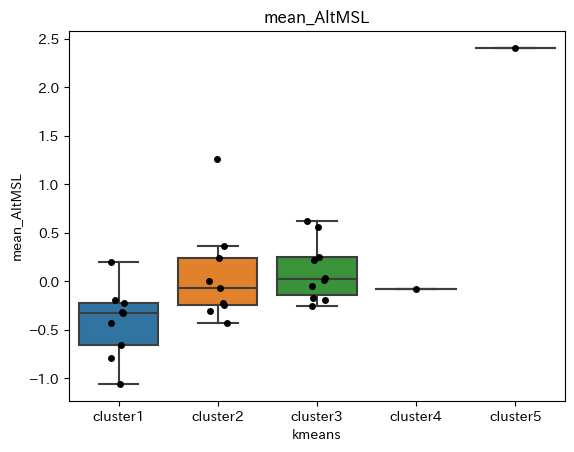

F= 11.640858212131477 p= 1.783346101367752e-05
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
cluster1 cluster2   0.4883 0.1062 -0.0688 1.0455  False
cluster1 cluster3   0.5256 0.0612 -0.0174 1.0687  False
cluster1 cluster4   0.3392 0.9283 -0.9067 1.5851  False
cluster1 cluster5   2.8274    0.0  1.5815 4.0733   True
cluster2 cluster3   0.0373 0.9996 -0.5058 0.5804  False
cluster2 cluster4  -0.1491 0.9965  -1.395 1.0968  False
cluster2 cluster5   2.3391 0.0001  1.0932  3.585   True
cluster3 cluster4  -0.1864 0.9916 -1.4261 1.0532  False
cluster3 cluster5   2.3018 0.0001  1.0621 3.5414   True
cluster4 cluster5   2.4882 0.0016  0.8167 4.1597   True
-------------------------------------------------------


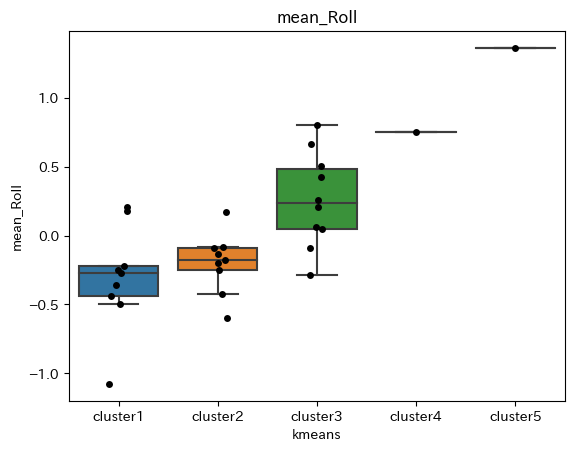

F= 10.303003596646429 p= 4.5294981298720406e-05
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
cluster1 cluster2   0.1036 0.9586 -0.3425 0.5496  False
cluster1 cluster3   0.5621 0.0068  0.1273 0.9968   True
cluster1 cluster4   1.0566  0.034  0.0592  2.054   True
cluster1 cluster5   1.6652 0.0004  0.6678 2.6625   True
cluster2 cluster3   0.4585 0.0351  0.0238 0.8933   True
cluster2 cluster4   0.9531 0.0661 -0.0443 1.9504  False
cluster2 cluster5   1.5616 0.0009  0.5642  2.559   True
cluster3 cluster4   0.4945 0.5943 -0.4978 1.4869  False
cluster3 cluster5   1.1031  0.024  0.1107 2.0955   True
cluster4 cluster5   0.6086 0.6723 -0.7296 1.9467  False
-------------------------------------------------------


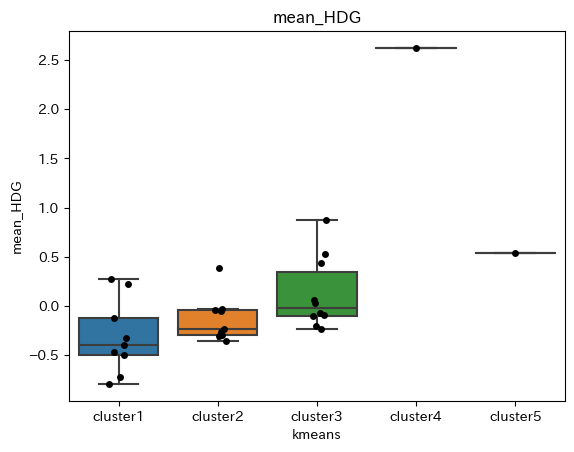

F= 18.994741368314976 p= 2.745478758028821e-07
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
cluster1 cluster2   0.1807 0.7767 -0.2793  0.6407  False
cluster1 cluster3   0.4385 0.0574 -0.0098  0.8869  False
cluster1 cluster4     2.94    0.0  1.9114  3.9686   True
cluster1 cluster5   0.8573 0.1356 -0.1713  1.8859  False
cluster2 cluster3   0.2578 0.4584 -0.1905  0.7062  False
cluster2 cluster4   2.7593    0.0  1.7306  3.7879   True
cluster2 cluster5   0.6766 0.3274  -0.352  1.7052  False
cluster3 cluster4   2.5014    0.0   1.478  3.5249   True
cluster3 cluster5   0.4188 0.7504 -0.6047  1.4422  False
cluster4 cluster5  -2.0827 0.0014 -3.4627 -0.7026   True
--------------------------------------------------------


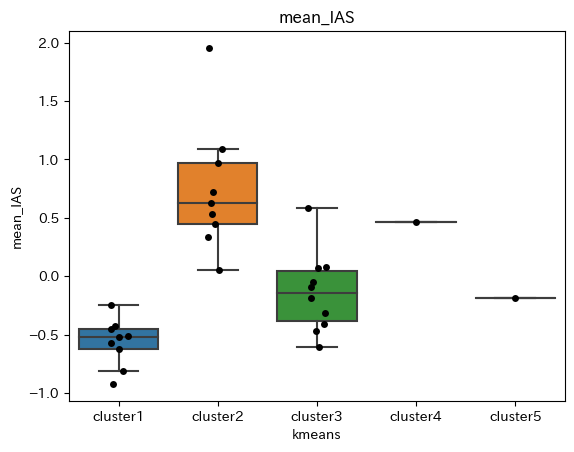

F= 13.643998304392241 p= 4.9604311407314475e-06
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
cluster1 cluster2   1.3123    0.0  0.7712  1.8533   True
cluster1 cluster3   0.4253 0.1573 -0.1021  0.9526  False
cluster1 cluster4   1.0294 0.1229 -0.1804  2.2392  False
cluster1 cluster5   0.3805  0.885 -0.8293  1.5902  False
cluster2 cluster3   -0.887 0.0004 -1.4143 -0.3597   True
cluster2 cluster4  -0.2829 0.9575 -1.4926  0.9269  False
cluster2 cluster5  -0.9318 0.1907 -2.1415   0.278  False
cluster3 cluster4   0.6041 0.5879 -0.5996  1.8078  False
cluster3 cluster5  -0.0448    1.0 -1.2485  1.1589  False
cluster4 cluster5  -0.6489 0.7656  -2.272  0.9742  False
--------------------------------------------------------


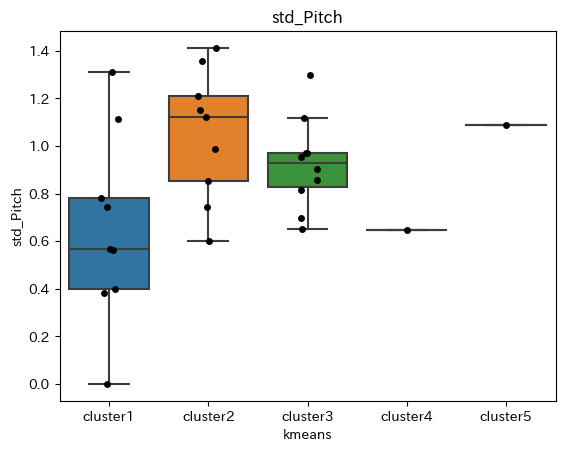

F= 2.417042722851801 p= 0.07533029638202478
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
cluster1 cluster2   0.3978 0.0593 -0.0111 0.8066  False
cluster1 cluster3   0.2724 0.2915 -0.1261 0.6709  False
cluster1 cluster4  -0.0029    1.0 -0.9172 0.9113  False
cluster1 cluster5    0.436  0.633 -0.4783 1.3502  False
cluster2 cluster3  -0.1254  0.885 -0.5239 0.2732  False
cluster2 cluster4  -0.4007 0.7012 -1.3149 0.5136  False
cluster2 cluster5   0.0382 0.9999 -0.8761 0.9524  False
cluster3 cluster4  -0.2753 0.8983  -1.185 0.6343  False
cluster3 cluster5   0.1635 0.9836 -0.7461 1.0732  False
cluster4 cluster5   0.4389 0.8293 -0.7877 1.6655  False
-------------------------------------------------------


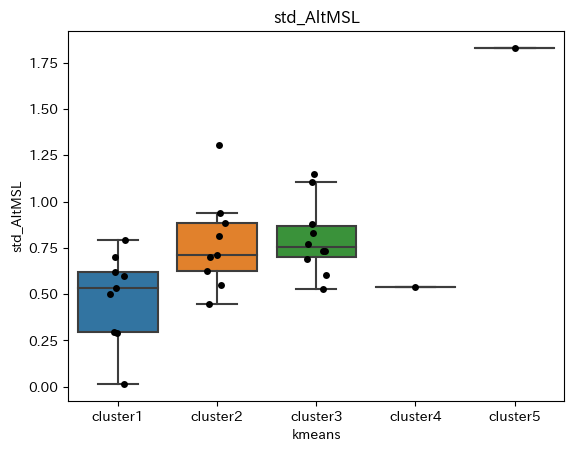

F= 8.732136614730177 p= 0.00014864310143994404
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
cluster1 cluster2   0.2928 0.0841 -0.0269 0.6125  False
cluster1 cluster3   0.3186 0.0433   0.007 0.6302   True
cluster1 cluster4   0.0578 0.9992  -0.657 0.7726  False
cluster1 cluster5   1.3463 0.0001  0.6315 2.0612   True
cluster2 cluster3   0.0258 0.9992 -0.2858 0.3374  False
cluster2 cluster4   -0.235 0.8679 -0.9498 0.4798  False
cluster2 cluster5   1.0535 0.0018  0.3387 1.7684   True
cluster3 cluster4  -0.2608 0.8165  -0.972 0.4505  False
cluster3 cluster5   1.0277 0.0022  0.3165  1.739   True
cluster4 cluster5   1.2885 0.0047  0.3295 2.2476   True
-------------------------------------------------------


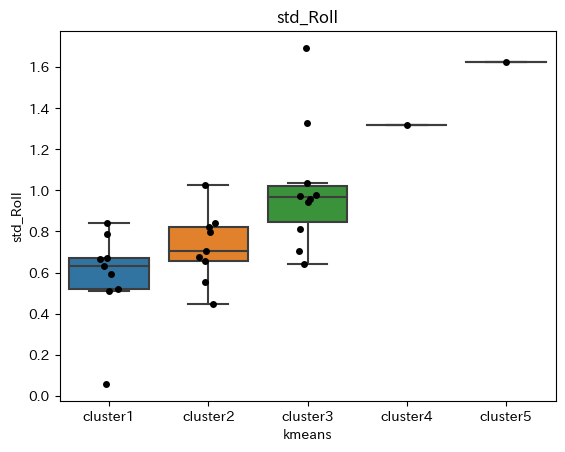

F= 7.666003552103257 p= 0.0003559779947691638
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
cluster1 cluster2    0.139 0.7464 -0.1988 0.4768  False
cluster1 cluster3   0.4217 0.0074  0.0925  0.751   True
cluster1 cluster4   0.7315  0.061 -0.0238 1.4868  False
cluster1 cluster5   1.0421 0.0036  0.2868 1.7974   True
cluster2 cluster3   0.2827 0.1176 -0.0465 0.6119  False
cluster2 cluster4   0.5924  0.177 -0.1628 1.3477  False
cluster2 cluster5   0.9031 0.0135  0.1478 1.6584   True
cluster3 cluster4   0.3097 0.7455 -0.4418 1.0612  False
cluster3 cluster5   0.6203 0.1418 -0.1312 1.3718  False
cluster4 cluster5   0.3106 0.8941 -0.7027 1.3239  False
-------------------------------------------------------


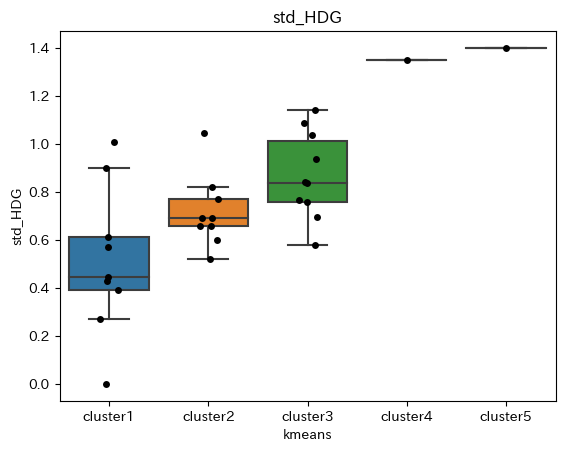

F= 7.255018080920228 p= 0.0005065856673234449
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
cluster1 cluster2   0.2026  0.326  -0.105 0.5102  False
cluster1 cluster3   0.3535 0.0152  0.0537 0.6533   True
cluster1 cluster4   0.8366 0.0117  0.1488 1.5244   True
cluster1 cluster5   0.8859  0.007  0.1982 1.5737   True
cluster2 cluster3   0.1509 0.5856  -0.149 0.4507  False
cluster2 cluster4    0.634 0.0812 -0.0538 1.3218  False
cluster2 cluster5   0.6833 0.0521 -0.0045 1.3711  False
cluster3 cluster4   0.4831 0.2625 -0.2012 1.1675  False
cluster3 cluster5   0.5325  0.183 -0.1519 1.2168  False
cluster4 cluster5   0.0493 0.9999 -0.8734 0.9721  False
-------------------------------------------------------


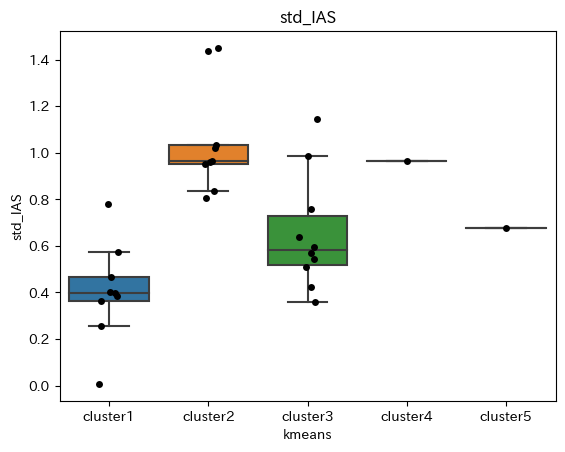

F= 9.309298260846349 p= 9.48339787953725e-05
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
cluster1 cluster2   0.6485    0.0   0.328   0.969   True
cluster1 cluster3   0.2502 0.1622 -0.0622  0.5626  False
cluster1 cluster4   0.5609 0.1787 -0.1558  1.2776  False
cluster1 cluster5   0.2721 0.7972 -0.4446  0.9888  False
cluster2 cluster3  -0.3983 0.0077 -0.7108 -0.0859   True
cluster2 cluster4  -0.0876 0.9962 -0.8043  0.6291  False
cluster2 cluster5  -0.3765 0.5459 -1.0932  0.3403  False
cluster3 cluster4   0.3107 0.7056 -0.4024  1.0239  False
cluster3 cluster5   0.0219    1.0 -0.6912   0.735  False
cluster4 cluster5  -0.2888 0.9008 -1.2504  0.6727  False
--------------------------------------------------------


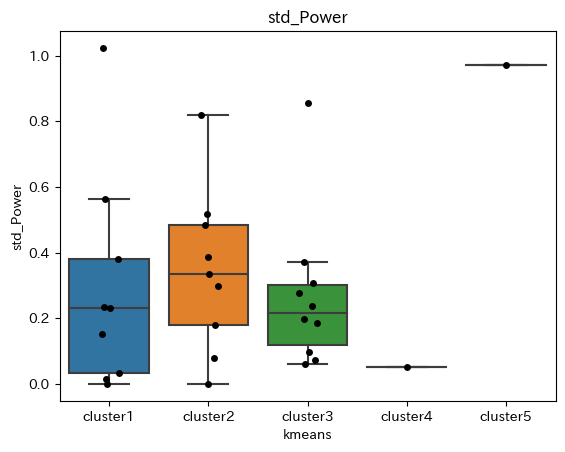

F= 1.8155442729312494 p= 0.15737281920440382
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
cluster1 cluster2   0.0524 0.9937 -0.3241 0.4289  False
cluster1 cluster3   -0.026 0.9996  -0.393  0.341  False
cluster1 cluster4  -0.2409 0.9154 -1.0828 0.6011  False
cluster1 cluster5   0.6795 0.1567 -0.1624 1.5215  False
cluster2 cluster3  -0.0784 0.9692 -0.4454 0.2886  False
cluster2 cluster4  -0.2933 0.8423 -1.1352 0.5486  False
cluster2 cluster5   0.6271  0.217 -0.2148 1.4691  False
cluster3 cluster4  -0.2149 0.9414 -1.0526 0.6228  False
cluster3 cluster5   0.7055 0.1292 -0.1322 1.5432  False
cluster4 cluster5   0.9204 0.1503 -0.2092   2.05  False
-------------------------------------------------------


In [33]:
for boxlabel in target:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.boxplot(x='kmeans', y=boxlabel, data=pd_flagnameinfo, showfliers=False, ax=ax)
    sns.stripplot(x='kmeans', y=boxlabel, data=pd_flagnameinfo, jitter=True, color='black', ax=ax)
    plt.title(boxlabel)
    plt.show()

    # クラスタごとにデータを分割
    cluster0 = pd_flagnameinfo[pd_flagnameinfo['kmeans'] == 'cluster1'][boxlabel]
    cluster1 = pd_flagnameinfo[pd_flagnameinfo['kmeans'] == 'cluster2'][boxlabel]
    cluster2 = pd_flagnameinfo[pd_flagnameinfo['kmeans'] == 'cluster3'][boxlabel]
    cluster3 = pd_flagnameinfo[pd_flagnameinfo['kmeans'] == 'cluster4'][boxlabel]
    cluster4 = pd_flagnameinfo[pd_flagnameinfo['kmeans'] == 'cluster5'][boxlabel]
    
    #ANOVAは、3つ以上のグループ間で平均値が統計的に有意に異なるかどうかをテスト
    # ANOVAを実施
    f_value, p_value = f_oneway(cluster0, cluster1, cluster2, cluster3, cluster4)#
    print('F=',f_value, 'p=',p_value)

    #クラスタ間の平均値にどこに差があるかを具体的に知りたい場合は、ANOVAの後に多重比較検定を行う必要があります。多重比較検定にはいくつかの方法がありますが、TukeyのHSD（Honestly Significant Difference）検定は、全てのペアの平均値の比較において、グループ間の差が統計的に有意かどうかを判断するためによく使用されます。
    # TukeyのHSD多重比較検定を実施
    tukey_results = pairwise_tukeyhsd(pd_flagnameinfo[boxlabel], pd_flagnameinfo['kmeans'], alpha=0.05)
    # 結果を表示
    print(tukey_results.summary())


In [34]:
df_zokuseis = pd.read_csv('属性情報.csv',index_col=0)
df_zokuseis

,flag,フラグ,何回目か,手動操縦,桜美林学生,米国ライセンス,日本_事業用ライセンス,日本_計器飛行ライセンス,定期操縦士ライセンス,ライセンス取得数
0,1,auto-pilot,1,False,False,False,False,False,False,0
1,2,学生1,1,True,True,True,False,False,False,1
2,3,学生2,1,True,True,True,False,False,False,1
3,4,学生3,1,True,True,True,False,False,False,1
4,5,学生4,1,True,True,True,False,False,False,1
5,6,学生4,2,True,True,True,False,False,False,1
6,7,学生5,1,True,True,True,False,False,False,1
7,8,学生6,1,True,True,True,False,False,False,1
8,9,学生7,1,True,True,True,False,False,False,1
9,10,学生8,1,True,True,True,False,False,False,1


In [35]:
maxlicensenum = max(df_zokuseis['ライセンス取得数'])
#maxlicensenum

kmeanslists = list(set(pd_flagnameinfo['kmeans']))
kmeanslists.sort()
#kmeanslists

licenses = [[0 for i in range(maxlicensenum+1)] for j in range(len(kmeanslists))]

# キーを指定して結合
merged_df = pd.merge(pd_flagnameinfo, df_zokuseis, left_on='flagname', right_on='flag', how='inner')  # キーを指定して内部結合
merged_df.to_csv('straight02_flagnameinfo_marge-zokusei.csv')

for df in merged_df.iloc:
    licenses[int(df['kmeans'][-1:])-1][df['ライセンス取得数']] += 1
    
    

<Figure size 500x300 with 0 Axes>

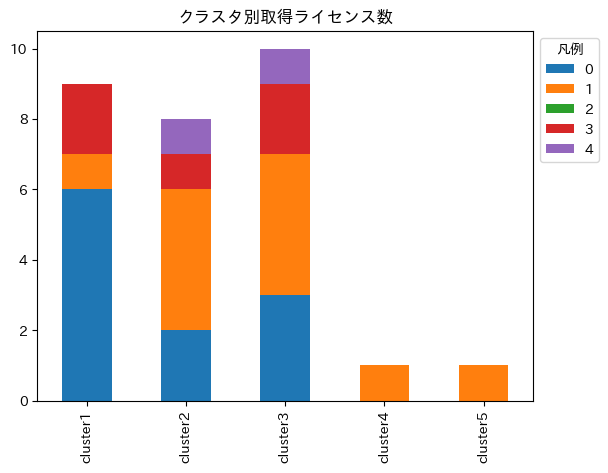

In [36]:
df_licenses = pd.DataFrame(licenses, columns=[i for i in range(maxlicensenum+1)], index=kmeanslists)

fig = plt.figure(figsize=(5,3))
# 積み上げグラフを描画
df_licenses.plot(kind='bar', stacked=True)

# グラフの装飾
#plt.xlabel('X軸')
#plt.ylabel('Y軸')
plt.title('クラスタ別取得ライセンス数')
plt.legend(title='凡例', bbox_to_anchor=(1, 1), loc='upper left')

# グラフの表示
plt.show()

<Figure size 800x500 with 0 Axes>

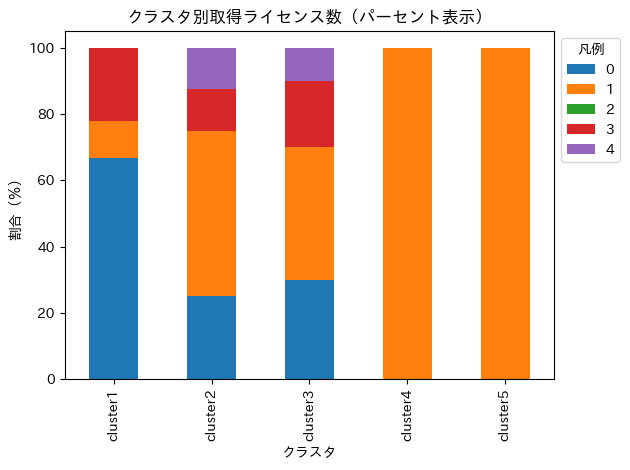

In [37]:
# 各行の合計で各値を割る
df_licenses_percent = df_licenses.div(df_licenses.sum(axis=1), axis=0) * 100

# グラフの描画
fig = plt.figure(figsize=(8, 5))
df_licenses_percent.plot(kind='bar', stacked=True)

# グラフの装飾
plt.title('クラスタ別取得ライセンス数（パーセント表示）')
plt.xlabel('クラスタ')
plt.ylabel('割合（％）')
plt.legend(title='凡例', bbox_to_anchor=(1, 1), loc='upper left')

# グラフの表示
plt.tight_layout()
plt.show()